# House Price Prediction - Linear Regression and Random Forest Algorithms
Objective: Analyze the effectiveness of Linear regression and Random Forest for predicting housing prices.

# Loading the dataset
(https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

In [ ]:
# Loading the dataset using pandas library
import pandas as pd
data = pd.read_csv('KeggleHousePrices_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Shape of the dataset (Number of rows and columns)

In [ ]:
data.shape

(1460, 81)

There are 1460 rows and 81 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Checking for missing values

In [ ]:
data.isnull().sum()
miss_val = data.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=data.isnull().sum().sort_values(ascending=False), columns=['Count_of_Missing_Values'])

miss_val['Percent'] = miss_val.Count_of_Missing_Values.apply(lambda x : '{:.2f}'.format(float(x)/data.shape[0] * 100))
miss_val = miss_val[miss_val.Count_of_Missing_Values > 0]
miss_val

,Count_of_Missing_Values,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [ ]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)

In [ ]:
data = data.drop(['Fence', 'MiscFeature', 'PoolQC','FireplaceQu','Alley'], axis=1)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotFrontage    1338 non-null   float64
 4   LotArea        1338 non-null   int64  
 5   Street         1338 non-null   object 
 6   LotShape       1338 non-null   object 
 7   LandContour    1338 non-null   object 
 8   Utilities      1338 non-null   object 
 9   LotConfig      1338 non-null   object 
 10  LandSlope      1338 non-null   object 
 11  Neighborhood   1338 non-null   object 
 12  Condition1     1338 non-null   object 
 13  Condition2     1338 non-null   object 
 14  BldgType       1338 non-null   object 
 15  HouseStyle     1338 non-null   object 
 16  OverallQual    1338 non-null   int64  
 17  OverallCond    1338 non-null   int64  
 18  YearBuil

In [ ]:
data.shape

(1338, 76)

Dataset has been cleaned!

# Visualizations

<ipython-input-78-befe32492243>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.SalePrice)


<Axes: xlabel='SalePrice', ylabel='Density'>

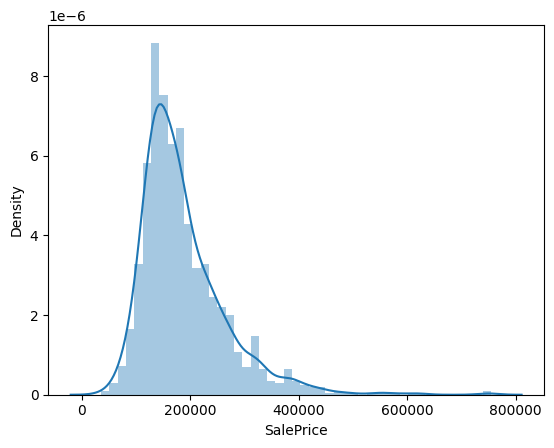

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.distplot(data.SalePrice)

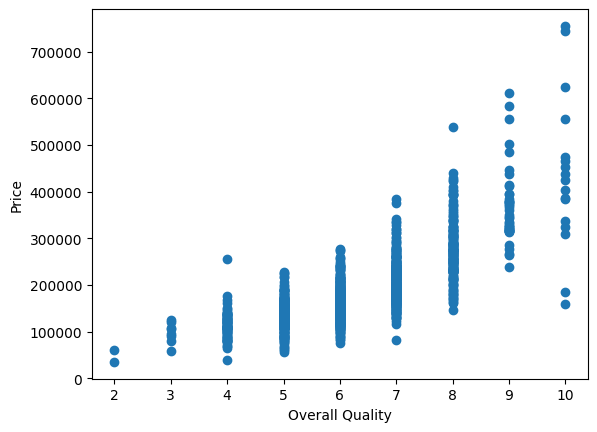

In [ ]:
plt.scatter(y=data['SalePrice'], x=data['OverallQual'])
plt.xlabel('Overall Quality')
plt.ylabel('Price')
plt.show()

We can see the SalePrice distribution is skewed to the right. Let's transform it so that it follows a gaussian normal distribution.

<ipython-input-81-72a4cd1d3b08>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data.SalePrice))


<Axes: xlabel='SalePrice', ylabel='Density'>

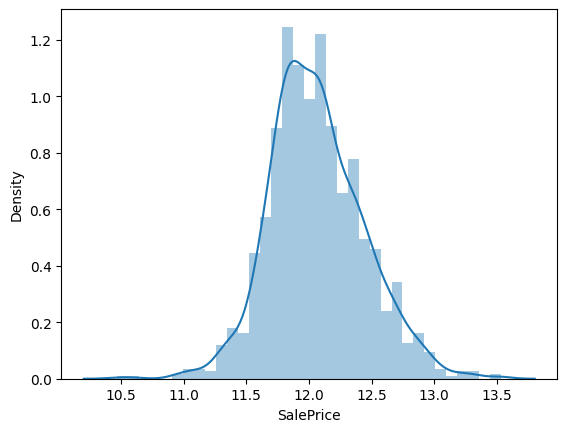

In [ ]:
sns.distplot(np.log(data.SalePrice))

In [ ]:
data['LogOfPrice'] = np.log(data.SalePrice)
data.drop(["SalePrice"], axis=1, inplace=True)

# Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split

# X & Y (Independent & Dependent Variables)

In [ ]:
df_temp = data.select_dtypes(include=["int64","float64"])
X = df_temp.drop(["LogOfPrice"],axis=1)

y = data.LogOfPrice

# Train - Test Split

In [ ]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

## Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
yr_hat = lr.predict(X_test)

In [ ]:
lr_score = lr.score(X_test, y_test)
print("Accuracy: ", lr_score)

Accuracy:  0.8839572248243519


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_mse = mean_squared_error(y_test, yr_hat)
lr_r2 = r2_score(y_test, yr_hat)

In [ ]:
print("Mean Squared Error: ",lr_mse)

Mean Squared Error:  0.01820770005228784


In [ ]:
print("R2: ", lr_r2)

R2:  0.8839572248243519


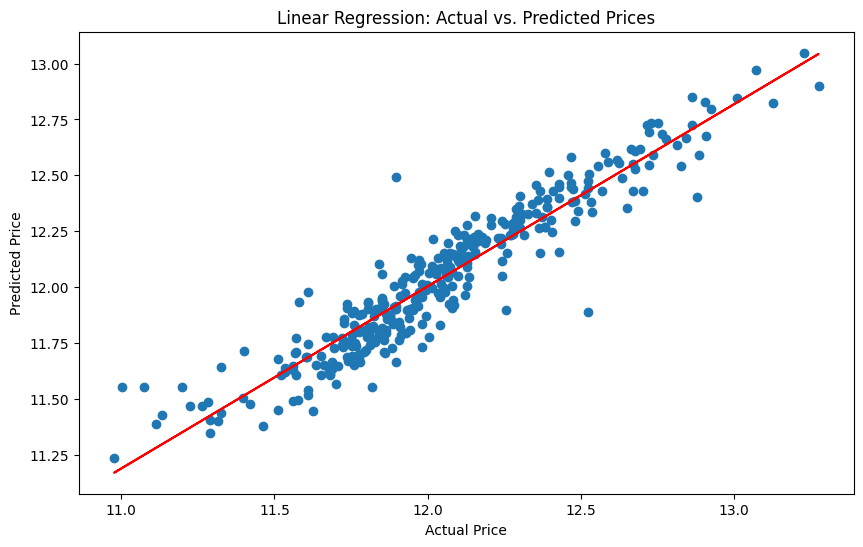

In [ ]:
# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yr_hat)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs. Predicted Prices")

# Plot the line of best fit
import numpy as np
z = np.polyfit(y_test, yr_hat, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red', label='Line of Best Fit')
plt.show()

## Random Forest

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

rf_pred = rfr.predict(X_test)

rfr_cv = cross_val_score(rfr,X, y, cv = 5, scoring = 'r2')
print("R2: ", rfr_cv.mean())

R2:  0.8563157651658797


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [ ]:
print("Mean Squared Error: ", rf_mse)

Mean Squared Error:  0.019673864547581636


In [ ]:
print("R2: ", rf_r2)

R2:  0.8746129476004685


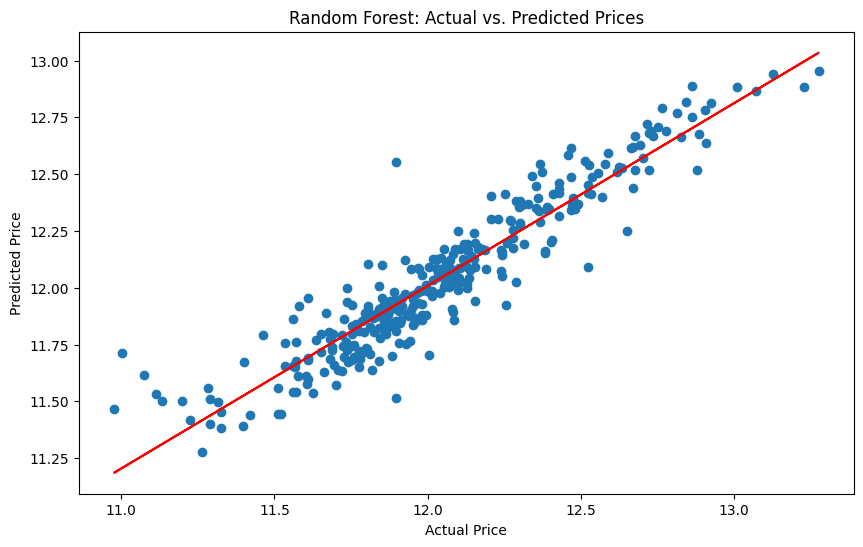

In [ ]:
# Scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs. Predicted Prices")

# Plot the line of best fit
z = np.polyfit(y_test, rf_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red', label='Line of Best Fit')
plt.show()

## Feature Importance

In [ ]:
rfr.feature_importances_

array([7.18655221e-03, 3.32806258e-03, 9.86932317e-03, 1.57887879e-02,
       5.30366969e-01, 1.08200559e-02, 2.85076818e-02, 2.08653717e-02,
       5.30190218e-03, 2.43664817e-02, 1.17395901e-03, 7.35615939e-03,
       3.89773902e-02, 4.93314609e-02, 1.22919677e-02, 3.74555609e-05,
       1.15565556e-01, 1.87516153e-03, 4.65302071e-04, 7.60603313e-03,
       1.12579710e-03, 2.27200046e-03, 5.37209641e-04, 3.59893222e-03,
       5.50565762e-03, 8.38549765e-03, 3.48890826e-02, 2.98458318e-02,
       4.29534359e-03, 5.80701509e-03, 3.81416414e-03, 1.00738700e-04,
       6.66002043e-04, 7.69944031e-05, 6.59670832e-04, 4.69964773e-03,
       2.63878085e-03])

In [ ]:
importance = rfr.feature_importances_

feature_importances = zip(importance, X.columns)

sorted_feature_importances = sorted(feature_importances, reverse = True)

top_5_predictors = sorted_feature_importances[0:5]
values = [value for value, predictors in top_5_predictors]
predictors = [predictors for value, predictors in top_5_predictors]
print(predictors)

['OverallQual', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'GarageCars']


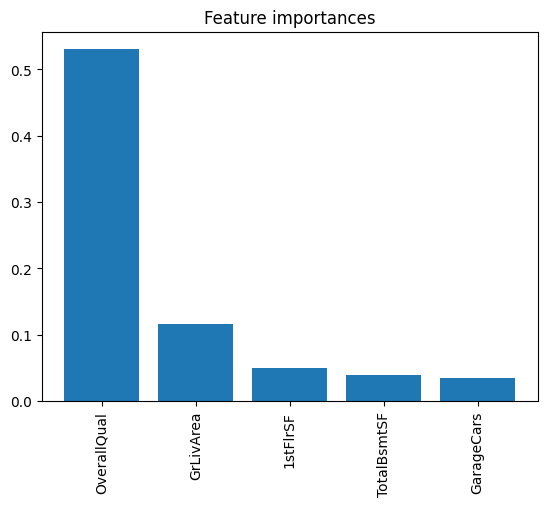

In [ ]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values, align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

### Here we could see that 'Overall Quality of the house has more impact on Price 